In [59]:
#from ensemble import RegressionEnsemble, MixedRegressionEnsemble, BootstrapEnsemble, ShuffleEnsemble
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import pandas as pd

# Repeating the results

In [60]:
boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

num_experiments = 100

## Simple trees

In [61]:
results_list = []

for i in range(num_experiments):
    treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor,seed = i+42)
    treeEnsemble.fit(X_train,y_train)
    results = treeEnsemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_tree_results = pd.DataFrame.from_records(results_list)

In [62]:
df_tree_results.head()

,correlation between error and variance,coverage probability,error normalcy,predictive power of y on the error,predictive power of y on the uncertainty,rsme
0,-0.029019,0.131737,244.215024,0.874304,0.874304,4.262507
1,-0.025103,0.131737,244.309858,0.873703,0.873703,4.271404
2,-0.016150,0.137725,243.869152,0.872520,0.872520,4.291311
3,-0.015190,0.125749,245.059659,0.873386,0.873386,4.279215
4,-0.017129,0.137725,245.650775,0.873625,0.873625,4.274653


In [63]:
df_tree_results.describe()

,correlation between error and variance,coverage probability,error normalcy,predictive power of y on the error,predictive power of y on the uncertainty,rsme
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.005667,0.123114,244.176372,0.871858,0.871858,4.301257
std,0.012656,0.010046,1.929781,0.001765,0.001765,0.028315
min,-0.035454,0.095808,239.790989,0.867836,0.867836,4.241548
25%,-0.015513,0.118263,242.759050,0.870222,0.870222,4.279030
50%,-0.003440,0.125749,244.502570,0.872057,0.872057,4.297514
75%,0.004464,0.131737,245.373501,0.873181,0.873181,4.325266
max,0.022294,0.143713,248.064378,0.875316,0.875316,4.364695


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ba41cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bbf8c18>]], dtype=object)

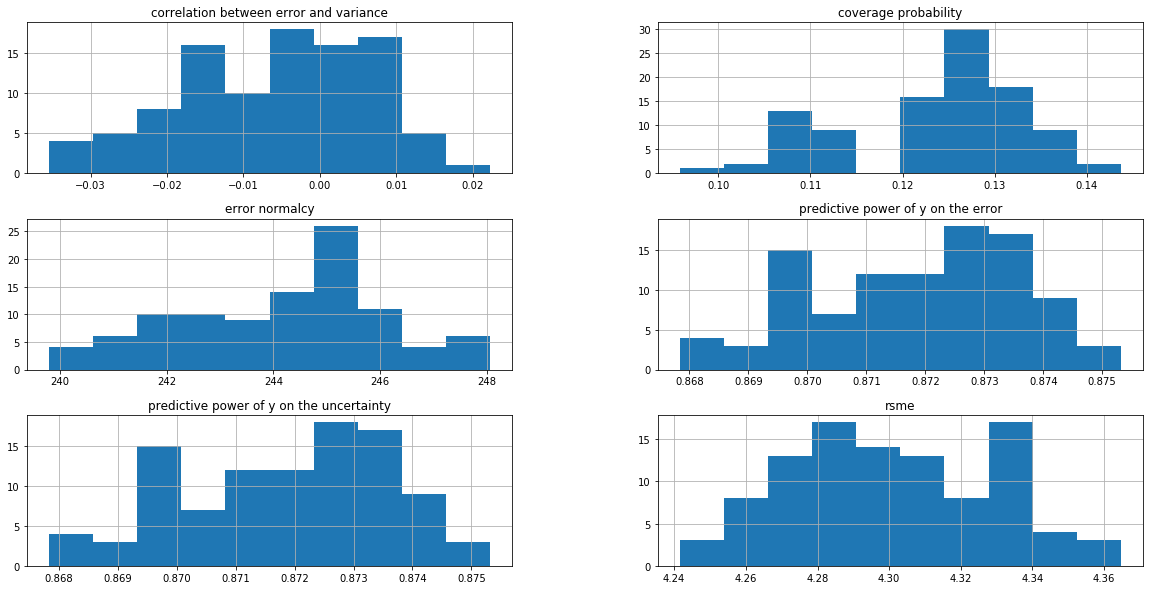

In [64]:
df_tree_results.hist()

## mixed Ensembles

In [65]:
results_list = []

for i in range(num_experiments):
    mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
    mixed_ensemble.fit(X_train,y_train)
    results = mixed_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_mixed_results = pd.DataFrame.from_records(results_list)

In [66]:
df_mixed_results.head()

,correlation between error and variance,coverage probability,error normalcy,predictive power of y on the error,predictive power of y on the uncertainty,rsme
0,0.756139,0.880240,72.740870,0.669912,0.669912,9.255364
1,0.379562,0.646707,161.252197,0.785475,0.785475,5.583263
2,0.530605,0.874251,42.350320,0.793612,0.793612,8.575173
3,0.451622,0.568862,146.258940,0.720608,0.720608,6.319128
4,0.554837,0.622754,169.811428,0.893505,0.893505,4.827643


In [69]:
df_mixed_results.describe()

,correlation between error and variance,coverage probability,error normalcy,predictive power of y on the error,predictive power of y on the uncertainty,rsme
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.558041,0.722934,125.969308,0.731700,0.731700,6.999731
std,0.115381,0.115348,53.489638,0.202958,0.202958,1.814384
min,0.263303,0.502994,25.814757,-0.184542,-0.184542,4.677433
25%,0.482430,0.621257,70.069780,0.720607,0.720607,5.431031
50%,0.557957,0.703593,149.969964,0.792509,0.792509,6.544701
75%,0.626591,0.844311,169.825841,0.838873,0.838873,8.366570
max,0.828286,0.916168,205.102864,0.901567,0.901567,11.749856


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c8077f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cd16278>]], dtype=object)

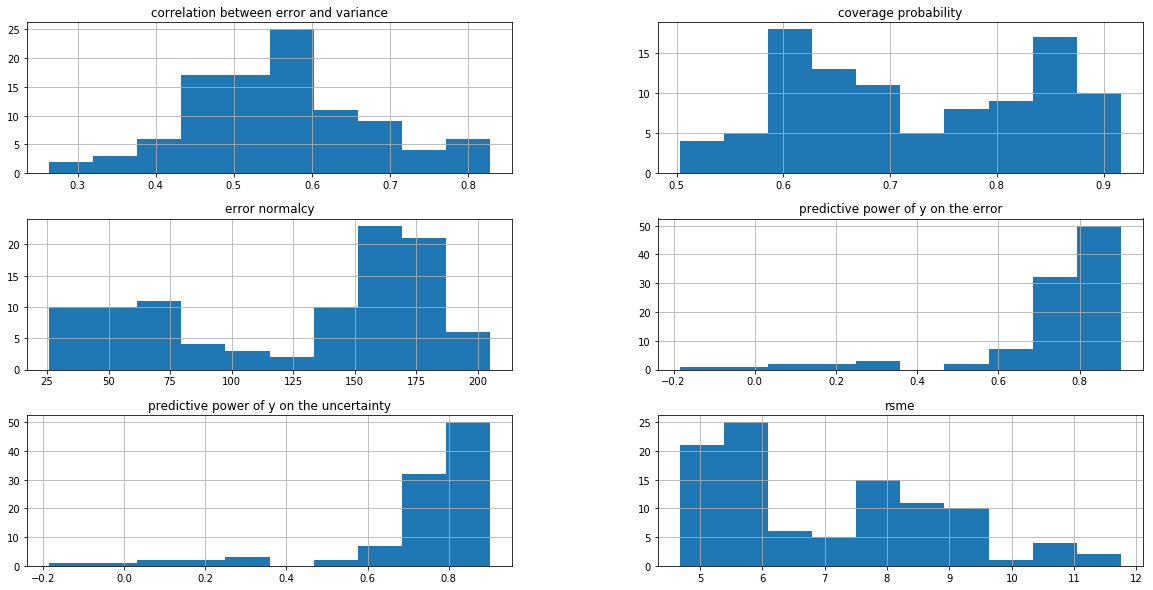

In [70]:
df_mixed_results.hist()

## Bootstrap

In [ ]:
results_list = []

for i in range(num_experiments):
    bootstrap_ensemble = ensemble.BootstrapEnsemble()

    bootstrap_ensemble.fit(X_train,y_train)
    results = bootstrap_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_bootstrap_results = pd.DataFrame.from_records(results_list)

In [ ]:
df_bootstrap_results.head()

In [67]:
df_bootstrap_results.describe()

,correlation between error and variance,coverage probability,error normalcy,predictive power of y on the error,predictive power of y on the uncertainty,rsme
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.400108,0.683832,314.813584,0.904380,0.904380,3.748356
std,0.014098,0.014057,4.854361,0.002802,0.002802,0.051631
min,0.377388,0.658683,307.750258,0.899532,0.899532,3.670794
25%,0.394548,0.682635,311.593488,0.902731,0.902731,3.705888
50%,0.396806,0.682635,313.733866,0.904144,0.904144,3.757408
75%,0.411929,0.687126,319.117863,0.906369,0.906369,3.782481
max,0.421702,0.712575,321.981954,0.908032,0.908032,3.834160


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bde6fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c6d2e80>]], dtype=object)

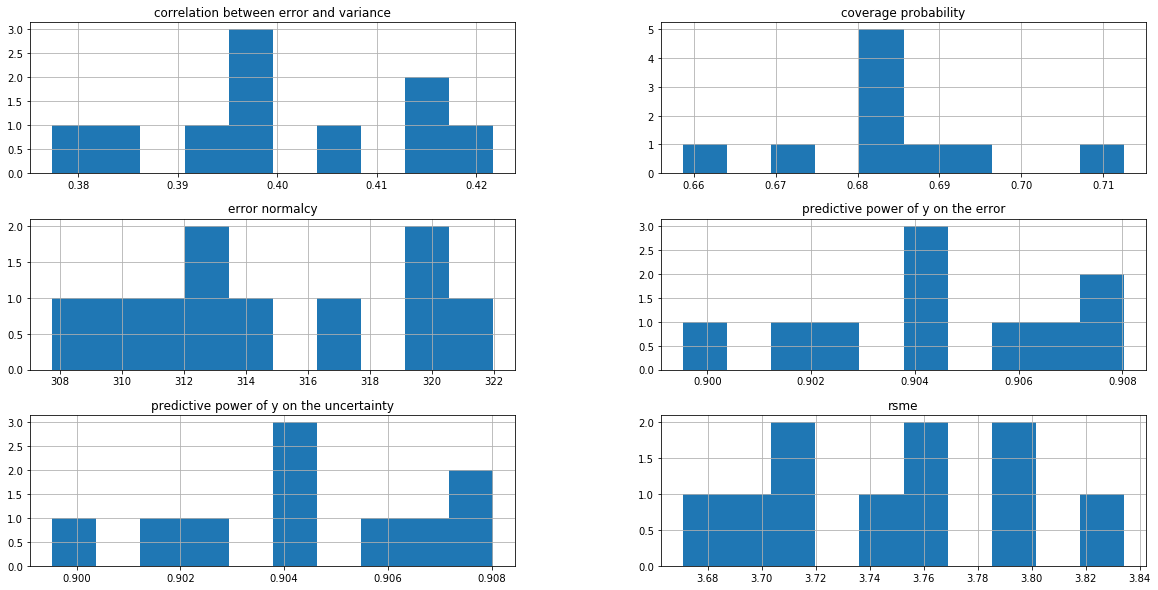

In [68]:
df_bootstrap_results.hist()

## Different Data Shuffling

In [ ]:
results_list = []

for i in range(num_experiments):
    shuffle_ensemble = ensemble.ShuffleEnsemble()
    shuffle_ensemble.fit(X_train,y_train)
    results = shuffle_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_shuffle_results = pd.DataFrame.from_records(results_list)

In [ ]:
df_shuffle_results.head()

In [71]:
df_shuffle_results.describe()

,correlation between error and variance,coverage probability,error normalcy,predictive power of y on the error,predictive power of y on the uncertainty,rsme
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.049423,0.155090,246.143976,0.873692,0.873692,4.271834
std,0.007790,0.015056,2.236743,0.002158,0.002158,0.034663
min,-0.062234,0.119760,243.719946,0.869967,0.869967,4.221570
25%,-0.055161,0.151198,244.481950,0.872541,0.872541,4.246697
50%,-0.048005,0.158683,245.614063,0.873818,0.873818,4.268474
75%,-0.043085,0.161677,247.632699,0.875307,0.875307,4.290412
max,-0.039600,0.173653,250.105311,0.876780,0.876780,4.333177


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd935f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d313080>]], dtype=object)

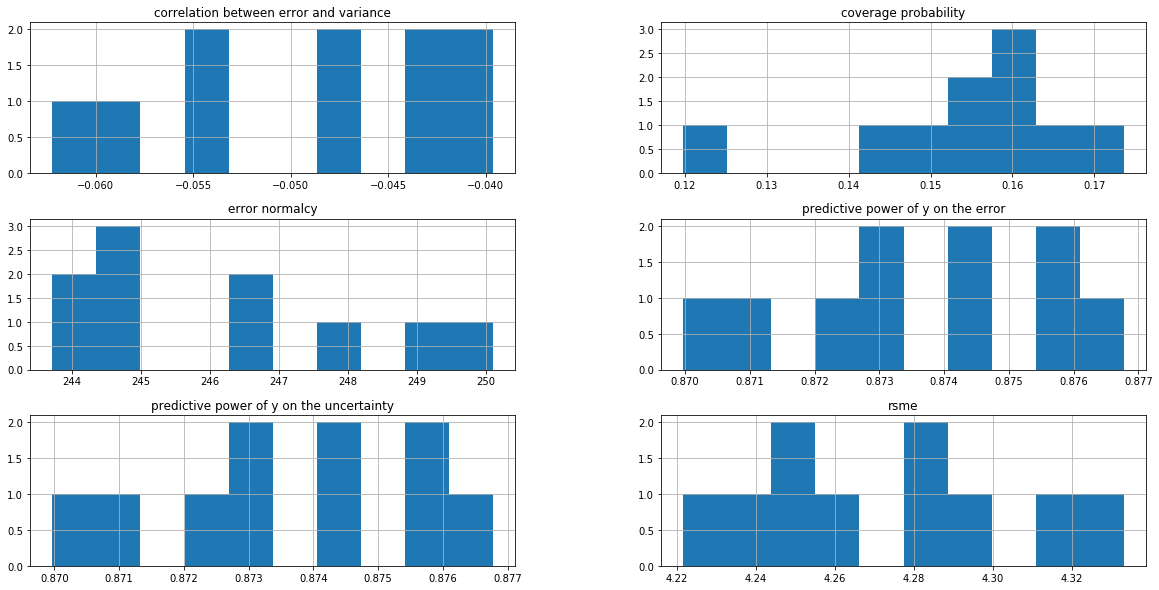

In [72]:
df_shuffle_results.hist()